<a href="https://colab.research.google.com/github/lacouth/metodos_numericos/blob/master/raizes/raizes_introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos

## Raízes: Método da Falsa Posição

### Patric Lacouth

# Método da Falsa Posição

* É um método intervalar
$$ f(x_i)f(x_f) < 0 $$


* É um método **iterativo**


### O Algoritmo 

<img src = "imagens/falsa_posicao.png" width = 50% style = "display:block;margin-left:auto;margin-right:auto;" />

### Equação de atualização

$$x_r = x_{max} - \frac{f(x_{max})(x_{min} - x_{max})}{f(x_{min} - f(x_{max}))}$$


# Critérios de parada

* Número de iterações
* Estimativa do erro de aproximação

### Erro de aproximação

$$ | \varepsilon_a | = \left | \frac{x^{novo}_r - x^{velho}_r }{x^{novo}_r} \right| 100% $$


## Sempre melhor?
<img src = "imagens/falsa_posicao_erro.png" width = 20% style = "display:block;margin-left:auto;margin-right:auto;"/>

# Exemplo 1

 Encontrar a raiz da função $f(x) = x^3 - 20$ no intervalo $1 \leq x \leq 4$

### Importar as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definir a função $f(x) = x^3 - 20$

In [2]:
def f(x):
    return x**3 - 20

In [3]:
f(1)

-19

### Traçar o gráfico da função

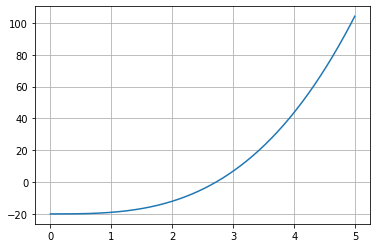

In [4]:
x = np.arange(0,5,0.01)
fx = f(x)
plt.plot(x,fx)
plt.grid(True)

#### Implementar a função da falsa posicao

In [5]:
def falsa_posicao(funcao,xmin,xmax,tol,max_it):
    if funcao(xmin) * funcao(xmax) > 0:
        print("Não há garantias de raiz dentro do intervalo")
    raizes = []
    erros = []
    for i in range(max_it):
#         xr = (xmin + xmax) / 2 # método da bisseção
        xr = xmax + (funcao(xmax) * (xmax - xmin)) / (funcao(xmin) - funcao(xmax))
        raizes.append(xr)
        if funcao(xmin) * funcao(xr) < 0:
            xmax = xr
        else:
            xmin = xr
        if i > 0:
            erro = np.abs((raizes[-1] - raizes[-2]) / raizes[-1]) * 100
            erros.append(erro)
            if erro < tol:
                return raizes,erros
    return raizes,erros

### Utilizado a função falsa_posicao

In [8]:
raizes,erros = falsa_posicao(f,1,4,0.0001,100)
x_raiz = raizes[-1]
f(x_raiz)

-3.097611736535555e-05

In [7]:
len(raizes)

14

### Mostrando a evolução do erro de aproximação

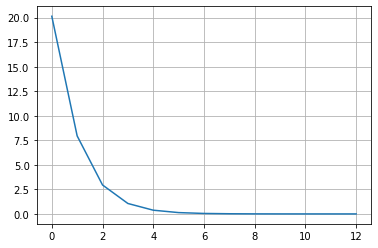

In [9]:
plt.plot(erros)
plt.grid(True)

# Now, go code!